In [2]:
import pandas as pd

df_banco = pd.read_csv('dataset_bancomundial_24.csv', sep=';', decimal = ',')

filtro_paises_sul_americanos = ['ARG', 'BRA', 'BOL',  'CHL',
                                'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

df_sula = df_banco.query('`Country Code` in @filtro_paises_sul_americanos')

# separando todos os indicatores do dataframe
rotulos = df_sula['Indicator Name'].unique()

# descobrindo o nome completo do filtro
for i in rotulos:
    if(str(i).find('GDP per capita' )) != -1:
        print(i)

filtro = ['GDP per capita (Constant 2005 USD)']

df_sula_gdp = df_sula.query('`Indicator Name` in @filtro')

df_sula_gdp
 


GDP per capita (Constant 2005 USD)


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
746,746,Argentina,ARG,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,2439.542262,3871.977071,3778.406097,4418.219862,3820.330238,...,5328.560130,7751.978054,6195.384942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2586,2586,Bolivia,BOL,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,645.560116,443.331882,901.248389,937.883283,562.181319,...,519.560844,752.828101,1051.471756,1256.631335,1628.699262,597.404396,1176.974475,1217.746318,1259.813782,1323.124571
2931,2931,Brazil,BRA,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,2088.416615,1847.818993,1886.379547,2061.223685,1821.598978,...,6273.575183,3103.437219,4874.601481,5121.028860,5616.506738,7687.688691,5618.324600,5721.289504,5730.249146,5823.043784
4311,4311,Chile,CHL,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,2479.185118,2158.779982,1972.754233,2669.119850,2550.355685,...,10058.195435,5528.101474,6679.934724,6672.929227,8382.314885,8217.059194,6381.815252,9029.733681,12454.182926,9728.481224
4541,4541,Colombia,COL,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,1452.070326,1483.790202,1779.067871,1921.283681,1570.606042,...,4313.032687,3392.924413,3565.886389,4617.132308,5329.909236,4429.775226,3937.867201,4140.829090,4909.552576,4394.066614
6381,6381,Ecuador,ECU,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,2216.182326,831.825242,1597.720999,1612.523159,1298.645301,...,2913.809095,4151.293036,3090.159460,3725.815668,3200.345261,1655.838472,3268.813790,3469.253651,3592.448131,3700.526148
9141,9141,Guyana,GUY,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,458.483824,783.707690,734.816202,435.571092,684.481626,...,1111.509544,1084.179401,1020.174872,1368.951404,1098.488909,1250.454295,1051.874357,1225.042304,1276.802138,1336.341400
17766,17766,Paraguay,PRY,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,569.512739,592.951574,596.502753,638.409004,617.154462,...,1524.880107,1479.403778,1522.006637,1575.577466,1646.017051,1553.003641,2191.660678,2594.051588,1978.737874,1929.094840
17881,17881,Peru,PER,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,1855.983158,1936.505045,2038.392034,2053.808225,2210.784660,...,2220.091668,3920.647792,2875.694802,3087.862122,3335.197474,2816.874704,3575.409732,3760.856554,5096.971760,4109.596136
21331,21331,Suriname,SUR,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,...,3476.253539,3590.541042,3686.699136,3835.309737,3955.944106,3055.125102,4207.062877,4388.522625,4480.125739,4568.685095


### 1- a) Considerando a década 1980 (1981-1990), defina a média para o indicador "GDP per capita" para o país SURINAME.


In [3]:
pais = 'SUR'

df_sur = df_sula_gdp.query('`Country Code` in @pais')
display(df_sur)

for x in df_sur.columns:
    # excluo as colunas não numericas
    if not (x.isnumeric()):
        df_sur = df_sur.drop([x], axis=1)
    else:
        # avalio periodo como inteiros
        if(int(x) < 1981 or int(x) > 1990):
            df_sur = df_sur.drop(x, axis=1)

display(df_sur)

 
df_sur.mean(numeric_only = True, axis = 1)

,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
21331,21331,Suriname,SUR,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,NaN,NaN,NaN,NaN,NaN,...,3476.253539,3590.541042,3686.699136,3835.309737,3955.944106,3055.125102,4207.062877,4388.522625,4480.125739,4568.685095


,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
21331,1998.644053,2933.385989,3184.716256,3492.035634,2239.31694,1852.236086,2730.513671,2919.993503,3186.91762,2613.230615


21331    2715.099037
dtype: float64

### 1 - b) Considerando o período 1970-1999, calcule a o coeficiente de variação (desvio padrão dividido pela média) das medidas válidas do indicador "GDP per capita" para o país BOLIVIA.

In [4]:
pais = 'BOL'

df_bol = df_sula_gdp.query('`Country Code` in @pais')
display(df_bol)
df_bol = df_bol.set_index('Country Code')

for x in df_bol.columns:
    # excluo as colunas não numericas
    if not (x.isnumeric()):
        df_bol = df_bol.drop([x], axis=1)
    else:
        # avalio periodo como inteiros
        if(int(x) < 1970 or int(x) > 1999):
            df_bol = df_bol.drop(x, axis=1)

display(df_bol)

display('Leituras invalidas: ', df_bol.isna().sum(axis=1))

df_bol = df_bol.dropna()
media = df_bol.mean(numeric_only=True, axis=1)
desvio = df_bol.std(numeric_only=True, axis=1)
cof =  desvio / media

display("Coeficiente: ", cof)


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2586,2586,Bolivia,BOL,GDP per capita (Constant 2005 USD),NY.GDP.PCAP.KD,645.560116,443.331882,901.248389,937.883283,562.181319,...,519.560844,752.828101,1051.471756,1256.631335,1628.699262,597.404396,1176.974475,1217.746318,1259.813782,1323.124571


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
Country Code,,,,,,,,,,,,,,,,,,,,,
BOL,779.186931,928.19451,977.741633,1182.580362,1012.968145,1255.312103,1083.434306,1110.535762,1106.857874,1082.51319,...,1180.360675,857.252798,1082.873176,1246.052644,574.009735,906.987112,1193.194795,794.038577,665.375146,961.350912


'Leituras invalidas: '

Country Code
BOL    0
dtype: int64

'Coeficiente: '

Country Code
BOL    0.240414
dtype: float64

### 2 - Com base no "dataset" da questão anterior, desenvolva um gráfico que apresente a evolução do indicador "GDP per capita" para os países "Brasil", "Uruguai", "Argentina" e "Paraguai", assim denomidados de países do ConeSul, no período 1995-2013.

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country Code,,,,,,,,,,,,,,,,,,,
ARG,5105.401225,3864.939130,5684.591029,5460.177670,5574.923919,4658.897800,2934.822598,6309.248005,2492.559163,5328.560130,7751.978054,6195.384942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRA,3420.814537,4700.104825,4403.812072,4339.170424,4362.989761,3425.669552,4402.511201,4458.333914,3762.302958,6273.575183,3103.437219,4874.601481,5121.028860,5616.506738,7687.688691,5618.324600,5721.289504,5730.249146,5823.043784
PRY,1620.977705,1378.227196,1264.294071,1100.079802,1309.216655,1485.216505,1443.060679,1414.072222,1446.359960,1524.880107,1479.403778,1522.006637,1575.577466,1646.017051,1553.003641,2191.660678,2594.051588,1978.737874,1929.094840
URY,4632.233514,4586.482022,6259.332919,5435.111513,5301.997368,5180.950587,6188.182078,4587.397180,4627.243729,4861.121242,5221.673186,6135.733623,5768.314574,6162.847727,6286.104002,4384.650449,7264.808954,7505.786591,7808.626662


'Leituras invalidas: '

Country Code
ARG    7
BRA    0
PRY    0
URY    0
dtype: int64

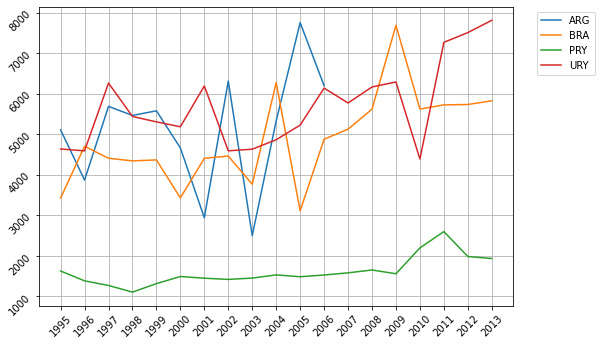

In [5]:
import matplotlib.pyplot as plt

pais = ['ARG', 'BRA', 'PRY', 'URY']

df_cone = df_sula_gdp.query('`Country Code` in @pais')
df_cone = df_cone.set_index('Country Code')

for x in df_cone.columns:
    # excluo as colunas não numericas
    if not (x.isnumeric()):
        df_cone = df_cone.drop([x], axis=1)
    else:
        # avalio periodo como inteiros
        if(int(x) < 1995 or int(x) > 2013):
            df_cone = df_cone.drop(x, axis=1)

display(df_cone)

display('Leituras invalidas: ', df_cone.isna().sum(axis=1))

for index, linha, in df_cone.iterrows():
    # transformar coluna em array
    coluna_array: pd.Series = linha.values
    # pegar o nome do país pelo índice da tabela original
    nome_pais: str = index
    plt.plot(df_cone.columns, coluna_array, label=nome_pais)

fig = plt.gcf()
fig.set_size_inches(8.5, 5.5, forward=True)
plt.grid()
plt.tick_params(rotation=45)
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")

plt.show()
